In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

### Wczytanie danych z .csv i wyświetlenie zawartości
Domyślnie pandas uznaje pierwszą kolumnę za index, drugi parametr na to nie pozwala

In [2]:
headers = ["timestamp", "x", "y", "z"]

In [3]:
df = pd.read_csv("acc.csv", header=None, names=headers)

In [4]:
df

,timestamp,x,y,z
0,1521970766866,-0.201113,7.718906,5.066131
1,1521970766880,0.153229,7.508216,5.861006
2,1521970766895,0.162806,7.422025,6.866570
3,1521970766924,0.325611,7.402872,7.105990
4,1521970766941,0.201113,7.307104,7.307104
5,1521970766957,0.373495,7.287950,6.521805
6,1521970766975,0.555455,7.326257,6.129156
7,1521970766995,0.957681,7.173029,5.516241
8,1521970767019,0.900220,6.560112,5.928043
9,1521970767040,0.555455,6.703765,6.636727


Usuwamy timestamp i wyświetlamy surowe dane

In [5]:
df2 = df.drop('timestamp', axis=1)

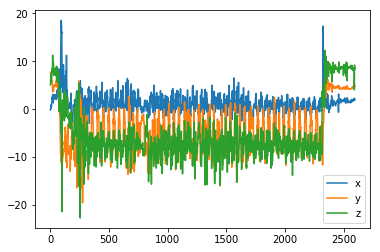

In [6]:
df2.plot()

In [7]:
data = [go.Scatter(x=np.linspace(0,1,df2.size), y=df2[headers[1]]),
        go.Scatter(x=np.linspace(0,1,df2.size), y=df2[headers[2]]),
        go.Scatter(x=np.linspace(0,1,df2.size), y=df2[headers[3]])]

To samo co wyżej, tylko w tym oknie mamy możliwość wyświetlania wybranych sygnałów oraz powiększania wykresu

In [8]:
iplot(data)

## Przejście z 3D na 1D
W wideo: 
https://www.youtube.com/watch?v=aGZs-dKhfng ziomek pracuje na wykresie norm wektorów (x,y,z) zamiast na trzech wykresach

In [9]:
cord_matrix = df2.as_matrix(columns=headers[1:])

In [10]:
mag_vector = np.linalg.norm(cord_matrix, axis=1)

In [11]:
mag_vector.size

2595

In [12]:
mag_data = [go.Scatter(x=np.linspace(0,1,mag_vector.size), y=mag_vector)]

In [13]:
iplot(mag_data)

In [14]:
def get_signal_data(filename):
    df = pd.read_csv(filename, header=None, names=headers)
    df2 = df.drop(headers[0], axis=1)
    cord_matrix = df2.as_matrix(columns=headers[1:])
    return np.linalg.norm(cord_matrix, axis=1)
    
    

In [15]:
walk = get_signal_data("acc_spacer.csv")
run = get_signal_data("acc_bieg.csv")

fft_walk = np.abs(np.fft.fft(walk))
fft_run = np.abs(np.fft.fft(run))

fft_plot = [go.Scatter(x=np.linspace(0,1,fft_walk.size), y=fft_walk, name="Spacer"),
            go.Scatter(x=np.linspace(0,1,fft_run.size), y=fft_run, name="Bieg")]

In [16]:
iplot(fft_plot)